In [127]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('heart.csv')

In [85]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [87]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Pre-Processing

In [88]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [89]:
X.shape, y.shape

((918, 11), (918,))

In [107]:
X = X.apply(LabelEncoder().fit_transform)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [108]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

In [109]:
x_train.shape, y_train.shape

((734, 11), (734,))

In [110]:
x_test.shape, y_test.shape

((184, 11), (184,))

In [111]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [112]:
x_train[0]

array([42,  1,  0, 41,  0,  1,  1, 83,  1, 30,  1])

In [113]:
x_test[0]

array([27,  1,  0, 18,  0,  1,  1, 81,  0, 11,  1])

In [114]:
y_train[0]

1

In [115]:
y_test[0]

1

In [116]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [117]:
x_train[0]

array([0.85714286, 1.        , 0.        , 0.62121212, 0.        ,
       1.        , 0.5       , 0.7008547 , 1.        , 0.57692308,
       0.5       ])

In [118]:
x_test[0]

array([0.55102041, 1.        , 0.        , 0.27272727, 0.        ,
       1.        , 0.5       , 0.68376068, 0.        , 0.21153846,
       0.5       ])

## Model Definition

In [146]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 128, activation= 'relu', input_shape= (11,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units = 128, activation= 'relu' ))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units = 128, activation= 'relu' ))
model.add(keras.layers.Dropout(0.9))
model.add(keras.layers.Dense(units = 128, activation= 'relu'))
model.add(keras.layers.Dense(units = 1, activation= 'sigmoid'))


In [147]:
model.compile(optimizer=tf.optimizers.Adam(), loss= tf.losses.binary_crossentropy, metrics = ['accuracy'])

In [148]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               1536      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 128)              

In [149]:
hist = model.fit(x_train, y_train, epochs = 200 , batch_size =128,  validation_data =(x_test, y_test))

Epoch 1/200
6/6 [==============================] - 2s 73ms/step - loss: 0.7022 - accuracy: 0.5286 - val_loss: 0.6702 - val_accuracy: 0.5815
Epoch 2/200
6/6 [==============================] - 0s 20ms/step - loss: 0.6769 - accuracy: 0.5531 - val_loss: 0.6484 - val_accuracy: 0.5815
Epoch 3/200
6/6 [==============================] - 0s 20ms/step - loss: 0.6458 - accuracy: 0.5926 - val_loss: 0.6254 - val_accuracy: 0.7011
Epoch 4/200
6/6 [==============================] - 0s 19ms/step - loss: 0.6417 - accuracy: 0.5913 - val_loss: 0.6025 - val_accuracy: 0.7989
Epoch 5/200
6/6 [==============================] - 0s 18ms/step - loss: 0.6275 - accuracy: 0.6158 - val_loss: 0.5739 - val_accuracy: 0.8261
Epoch 6/200
6/6 [==============================] - 0s 18ms/step - loss: 0.6096 - accuracy: 0.6717 - val_loss: 0.5513 - val_accuracy: 0.8152
Epoch 7/200
6/6 [==============================] - 0s 14ms/step - loss: 0.5915 - accuracy: 0.6676 - val_loss: 0.5208 - val_accuracy: 0.8152
Epoch 8/200
6/6 [===

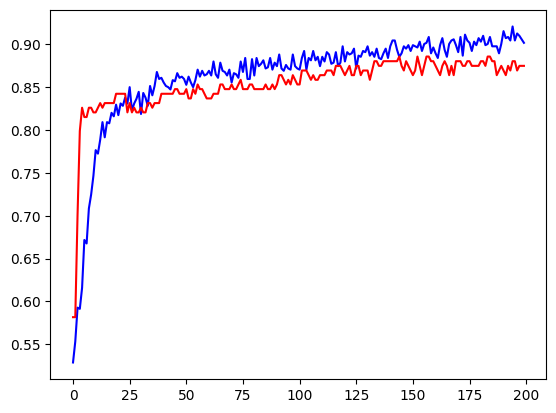

In [150]:
plt.plot(hist.history['accuracy'], color= 'b')
plt.plot(hist.history['val_accuracy'], color= 'r')

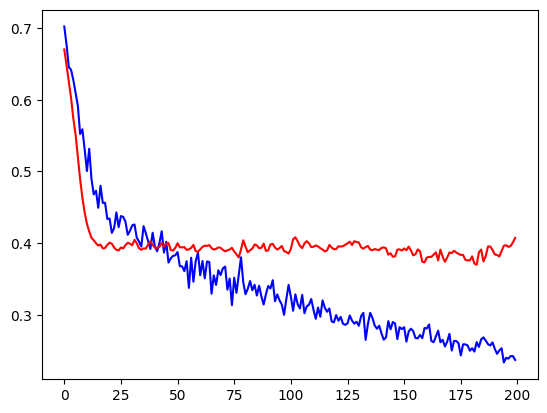

In [152]:
plt.plot(hist.history['loss'], color= 'b')
plt.plot(hist.history['val_loss'], color= 'r')

## End